## Resizing


In [1407]:
from sympy import Matrix as M
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
from imutils import find_function
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
plt.style.use('ggplot')
from matplotlib.ticker import FuncFormatter
np.set_printoptions(threshold=100, precision=3, edgeitems=20)

In [862]:
def new_img(size=20): return np.zeros((size, size), dtype=np.uint8)

In [863]:
fig = plt.figure(figsize=(10, 10))    
gs = fig.add_gridspec(1, 3)
a=new_img(size=10)

<Figure size 720x720 with 0 Axes>

In [864]:
M(a)

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [865]:
cv.rectangle(a, (1, 1), (4, 4), 255, 1)
M(a)

Matrix([
[0,   0,   0,   0,   0, 0, 0, 0, 0, 0],
[0, 255, 255, 255, 255, 0, 0, 0, 0, 0],
[0, 255,   0,   0, 255, 0, 0, 0, 0, 0],
[0, 255,   0,   0, 255, 0, 0, 0, 0, 0],
[0, 255, 255, 255, 255, 0, 0, 0, 0, 0],
[0,   0,   0,   0,   0, 0, 0, 0, 0, 0],
[0,   0,   0,   0,   0, 0, 0, 0, 0, 0],
[0,   0,   0,   0,   0, 0, 0, 0, 0, 0],
[0,   0,   0,   0,   0, 0, 0, 0, 0, 0],
[0,   0,   0,   0,   0, 0, 0, 0, 0, 0]])

In [866]:
b = cv.resize(a, dsize=(20, 30))

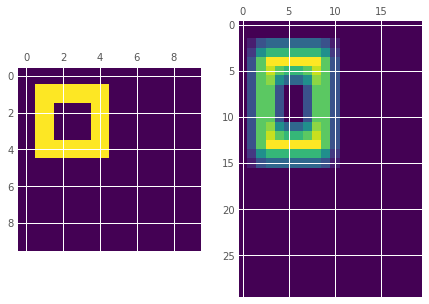

In [867]:
ax1=fig.add_subplot(gs[0, 0])
ax1.matshow(a)
ax2=fig.add_subplot(gs[0, 1])
ax2.matshow(b)
fig

## scipy Interpolation

In [868]:
from scipy.interpolate import interp1d
x = np.linspace(0, 6, 200); # fine sampling to represent continuous function
xs = np.array([0, 1, 2, 3, 4, 5, 6]); # the sample points
f = np.sin(x) + x**0.5
F = np.sin(xs) + xs**0.5 # the 'continuous' function and its sampled version
ifunc = interp1d(xs, F, kind='zero')
hatf_nn = ifunc(x)

In [869]:
kinds = ["linear", "nearest", "nearest-up", "zero", "slinear", "quadratic", "cubic", "previous", "next"]

In [870]:
def plot(xs, ax=None):
    if ax is None: ax = fig.add_subplot()

In [871]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(3, 3)

<Figure size 720x720 with 0 Axes>

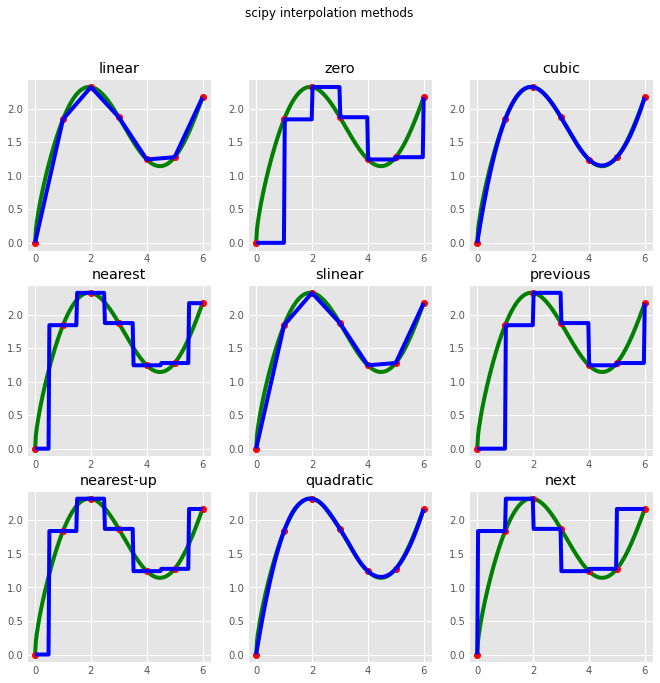

<Figure size 432x288 with 0 Axes>

In [872]:
def t(x): return x%3, x//3
plt.clf()
for i, kind in enumerate(kinds):
    ifunc = interp1d(xs, F, kind=kind)
    hatf_nn = ifunc(x)
    i, j = t(i)
    ax = fig.add_subplot(gs[i, j])
    ax.plot(x, f, 'g-', xs, F, 'ro', x, hatf_nn, 'b-')
    ax.set_title(kind)
fig.suptitle("scipy interpolation methods")
fig

## opencv interpolate

In [873]:
imodes = [cv.INTER_NEAREST, 
          cv.INTER_LINEAR, 
          cv.INTER_CUBIC, 
          cv.INTER_AREA, 
          cv.INTER_LANCZOS4, 
          cv.INTER_LINEAR_EXACT, 
          cv.INTER_NEAREST_EXACT, 
#           cv.INTER_MAX, 
#           cv.WARP_FILL_OUTLIERS, 
#           cv.WARP_INVERSE_MAP
         ]
names = ["cv.INTER_NEAREST", 
          "cv.INTER_LINEAR", 
          "cv.INTER_CUBIC", 
          "cv.INTER_AREA", 
          "cv.INTER_LANCZOS4", 
          "cv.INTER_LINEAR_EXACT", 
          "cv.INTER_NEAREST_EXACT", 
#           "cv.INTER_MAX", 
#           "cv.WARP_FILL_OUTLIERS", 
#           "cv.WARP_INVERSE_MAP"
        ]

In [874]:
d = dict(zip(names, imodes))

Text(0.5, 1.0, 'original')

<Figure size 432x288 with 0 Axes>

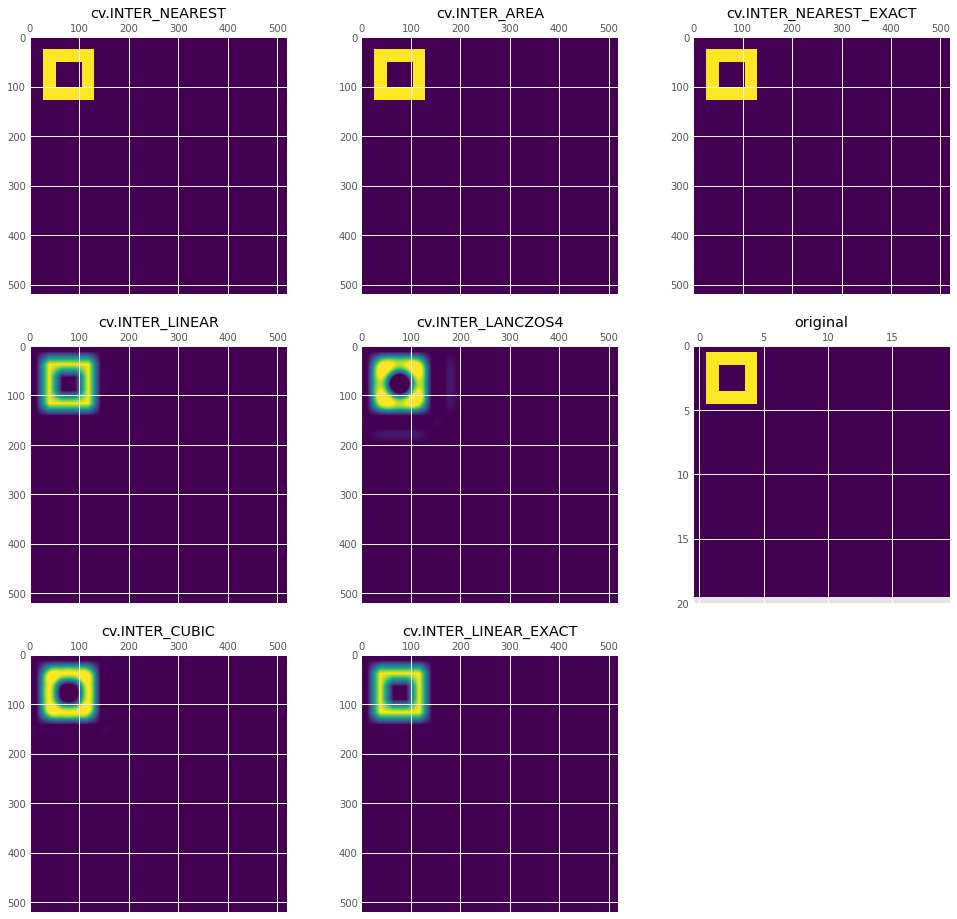

In [875]:
plt.clf()
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 3)

newsize=520
for i, mode in enumerate(d.keys()):
    a = new_img()
    cv.rectangle(a, (1, 1), (4, 4), 255, 1)
    x, y = i%3, i // 3
    ax=fig.add_subplot(gs[x, y])
    ax.matshow(a)
    b = cv.resize(a, dsize=(newsize, newsize), interpolation=d[mode])
    ax.set_title(mode)
    ax.matshow(b)

a = new_img()
cv.rectangle(a, (1, 1), (4, 4), 255, 1)    
ax=fig.add_subplot(gs[1, 2])
# ax.set_xlim([0, 20])
ax.set_ylim([20, 0])
ax.matshow(a)
ax.set_title('original')


## Translation

Translation Matrix

$$
\left[\begin{array}{ccc}
1 & 0 & T_{x} \\
0 & 1 & T_{y} \\
0 & 0 & 1
\end{array}\right]
$$

In [876]:
tx = 3
ty = 8
t = np.array([[1, 0, tx], 
              [0, 1, ty]], dtype=np.float32)
M(t)

Matrix([
[1.0, 0.0, 3.0],
[0.0, 1.0, 8.0]])

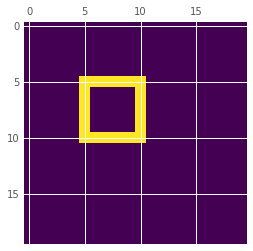

In [877]:
a = new_img()
cv.rectangle(a, (5, 5), (10, 10), 255, 1)
plt.matshow(a)

Text(0.5, 1.0, '$t_x=3, t_y=8$')

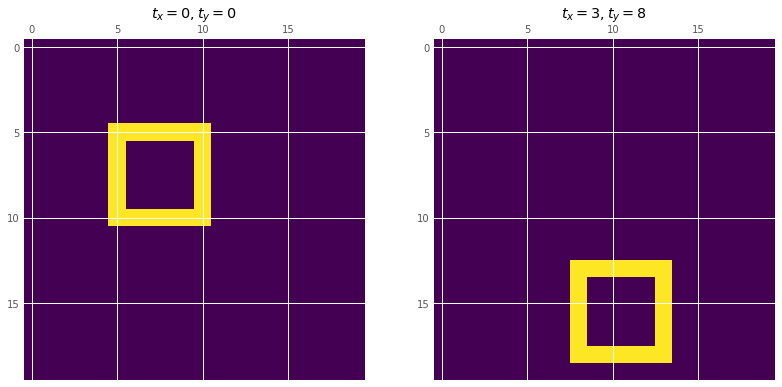

In [878]:
w = cv.warpAffine(a, t, a.shape, flags=cv.INTER_LANCZOS4)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((12, 12))
ax1.matshow(a)
ax1.set_title("$t_x=0, t_y=0$")
ax2.matshow(w)
ax2.set_title(f"$t_x={tx}, t_y={ty}$")

## Rotation

In [879]:
th = np.pi/8
r = np.array([[np.cos(th), -np.sin(th), 1], 
              [np.sin(th), np.cos(th), 1]], dtype=np.float32)

In [880]:
M(r)

Matrix([
[ 0.92388, -0.382683, 1.0],
[0.382683,   0.92388, 1.0]])

Text(0.5, 1.0, '$\\theta=\\dfrac{\\pi}{8}$')

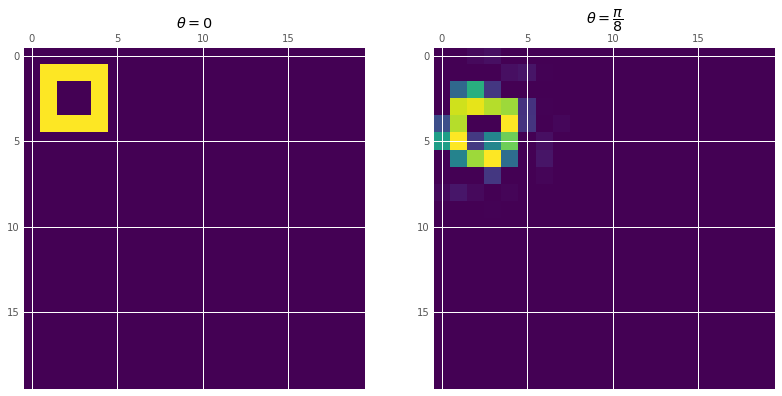

In [881]:
a = new_img()
cv.rectangle(a, (1, 1), (4, 4), 255, 1)
w = cv.warpAffine(a, r, a.shape, flags=cv.INTER_LANCZOS4)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((12, 12))
ax1.matshow(a)
ax1.set_title("$\\theta=0$")
ax2.matshow(w)
ax2.set_title("$\\theta=\\dfrac{\pi}{8}$")

## Flipping

In [882]:
a = new_img()
h, w = a.shape[:2]
cv.line(a, (1, 1), (4, 14), 255, 1)
cv.line(a, (1, 5), (6, 5), 255, 1)
f = np.array([[1.5, 0, -1], 
              [0, 1.5, 1]], dtype=np.float32)
M(f)

Matrix([
[1.5, 0.0, -1.0],
[0.0, 1.5,  1.0]])

Text(0.5, 1.0, 'flipped -1')

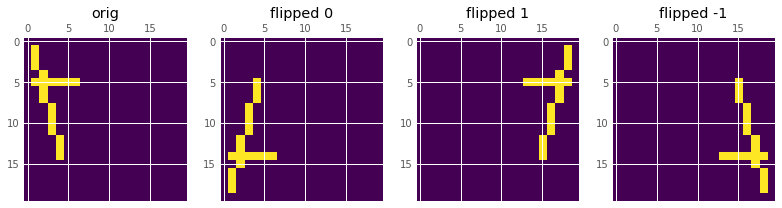

In [883]:
w = cv.warpAffine(a, f, a.shape, flags=cv.WARP_INVERSE_MAP)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches((12, 12))

ax1.matshow(a)
ax1.set_title("orig")

ax2.matshow(cv.flip(a, 0))
ax2.set_title("flipped 0")

ax3.matshow(cv.flip(a, 1))
ax3.set_title("flipped 1")

ax4.matshow(cv.flip(a, -1))
ax4.set_title("flipped -1")

## Masking

## Image Arithmetic

## Noise Reduction Using Smoothing and Blurring

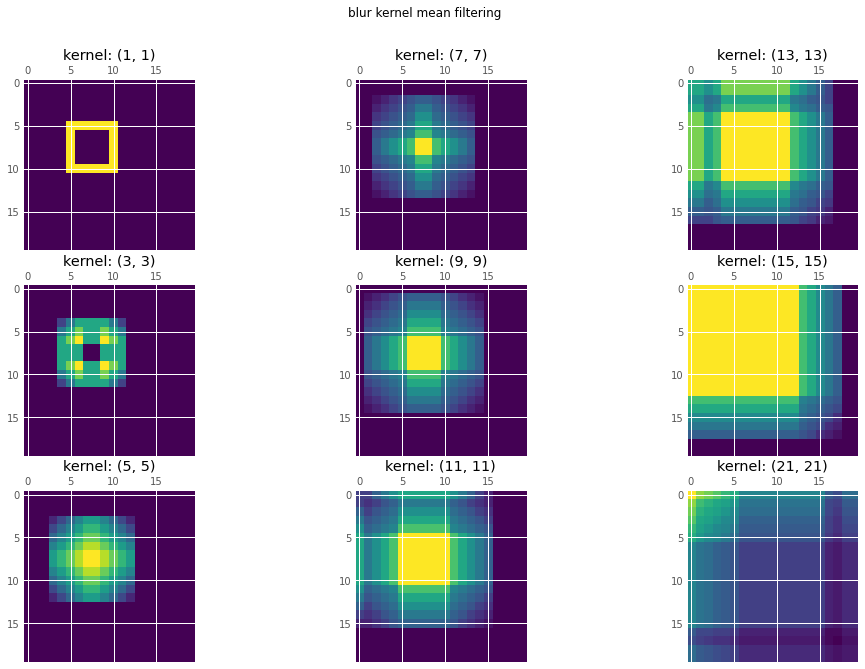

In [884]:
a = new_img()
cv.rectangle(a, (5, 5), (10, 10), 255, 1)
ks = [(1, 1), (3, 3), (5, 5), (7, 7), (9, 9), (11, 11), (13, 13), (15, 15), (21, 21)]
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)
fig.suptitle('blur kernel mean filtering')

for x, k in enumerate(ks):
    i, j = x%3, x//3
    ax = fig.add_subplot(gs[i, j])
    ax.matshow(cv.blur(a, k))
    ax.set_title(f"kernel: {k}")

## Gaussian Filtering

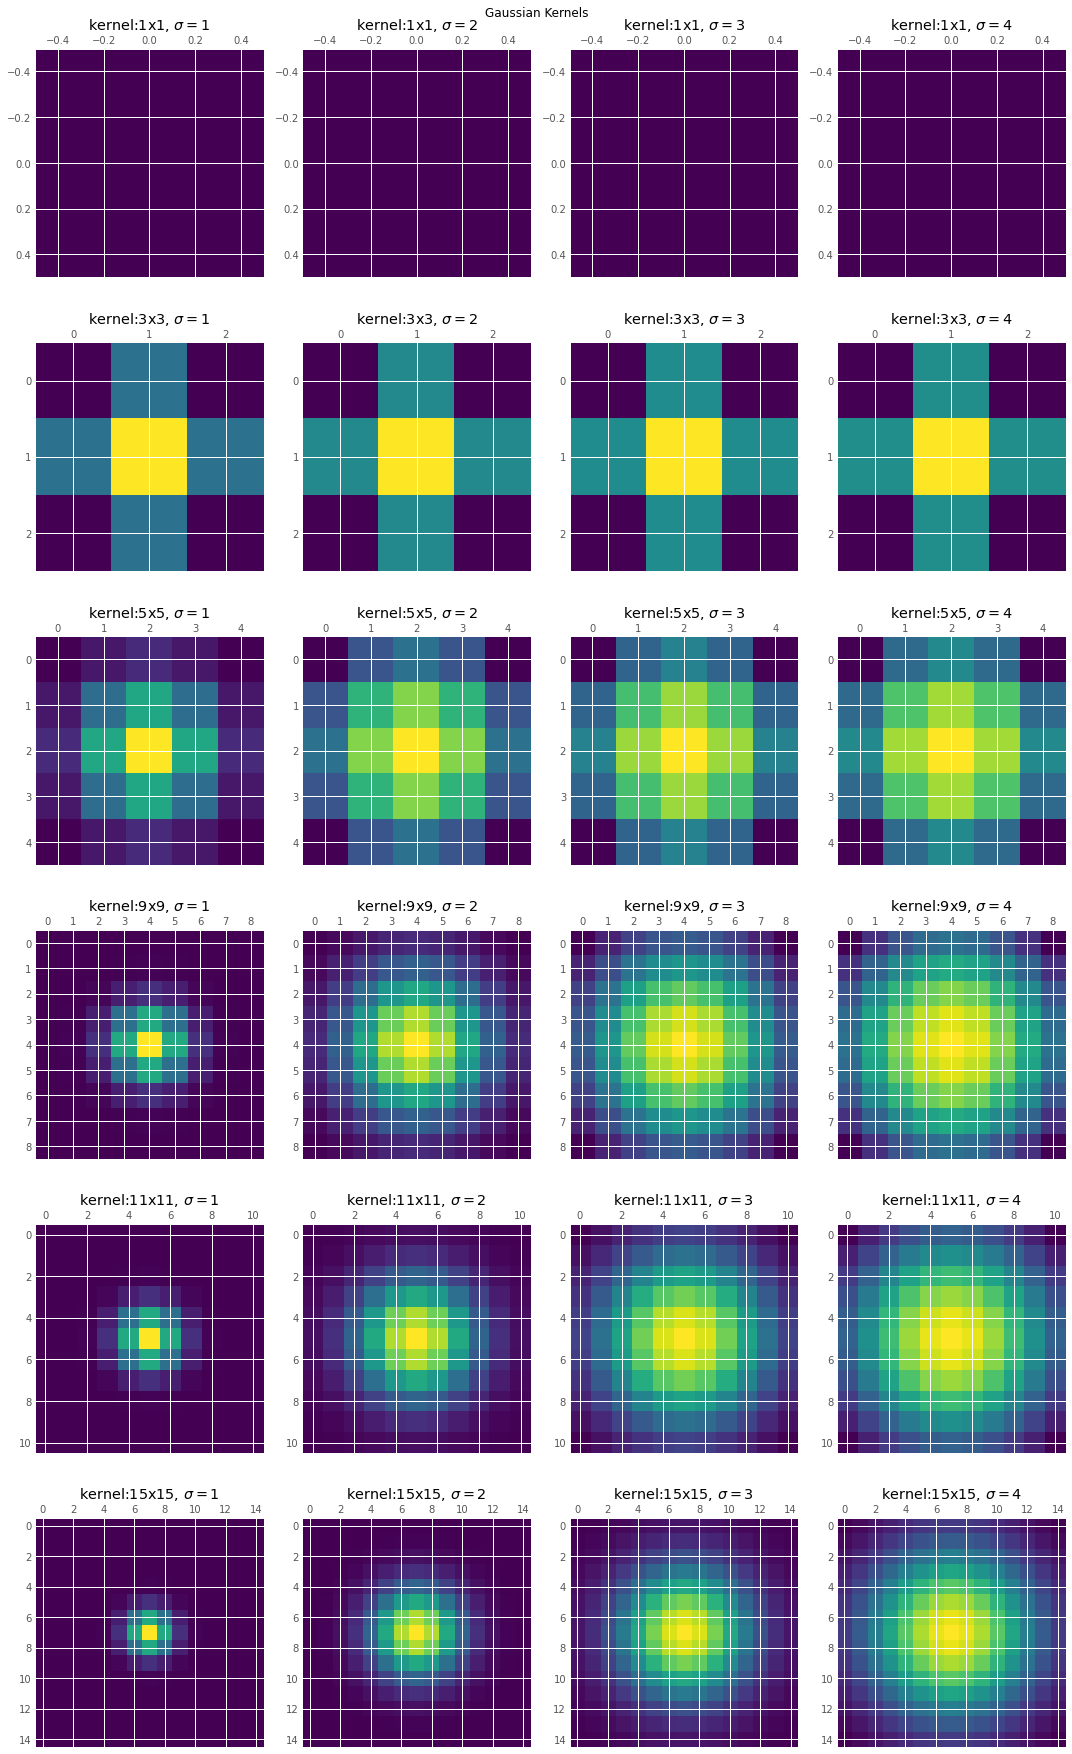

In [885]:
ks = [1, 3, 5, 9, 11, 15]
sigmas = list(range(1, 5))
a = cv.getGaussianKernel(ksize=11, sigma=3)

fig = plt.figure(figsize=(15, 25))
gs = fig.add_gridspec(len(ks), len(sigmas))
fig.clf()

for i, k in enumerate(ks):
    for j, sigma in enumerate(sigmas):
        a = cv.getGaussianKernel(ksize=k, sigma=sigma)
        a = a@a.T
        ax = fig.add_subplot(gs[i, j])
        ax.matshow(a)
        ax.set_title(f"kernel:{k}x{k}, $\\sigma={sigma}$")
fig.suptitle("Gaussian Kernels")
fig.tight_layout()

## Median Blurring

In [886]:
find_function("kernel")
cv.medianBlur

1. GFLUID_KERNEL_KIND_FILTER
2. GFLUID_KERNEL_KIND_RESIZE
3. GFLUID_KERNEL_KIND_YUV420TO_RGB
4. GFluidKernel_Kind_Filter
5. GFluidKernel_Kind_Resize
6. GFluidKernel_Kind_YUV420toRGB
7. gapi_GKernelPackage
8. getDerivKernels
9. getGaborKernel
10. getGaussianKernel


<function medianBlur>

## Bilateral Blurring

preserves edges while blurring, which is an improvement over guassian blurring

uses two gaussians.

first gaussian uses neighbors based on kernel and sigma
second gaussian only considers those neighbors which have similar intensities thereby preserving edges

In [887]:
a = cv.imread('sudoku9.jpg')[:50, :50]

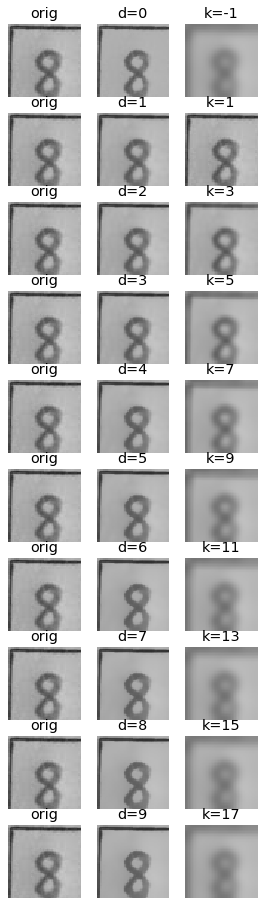

In [888]:
ds = list(range(10))
fig = plt.figure(figsize=(4, 15))
gs = fig.add_gridspec(len(ds), 3)
fig.tight_layout()
for i, d in enumerate(ds):
    a = cv.imread('sudoku9.jpg')[:50, :50]
    ax0 = fig.add_subplot(gs[i, 0])
    ax0.matshow(a)
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title('orig')
    
    b= cv.bilateralFilter(src=a, d=d, sigmaColor=50, sigmaSpace=50)
    ax1 = fig.add_subplot(gs[i, 1])
    ax1.matshow(b)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(f'd={d}')
    
    c = cv.GaussianBlur(src=a, ksize=(i*2-1, i*2-1), sigmaX=3, sigmaY=3)
    ax2 = fig.add_subplot(gs[i, 2])
    ax2.matshow(c)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title(f"k={i*2-1}")

## Binarization

convert grayscale image into a binary

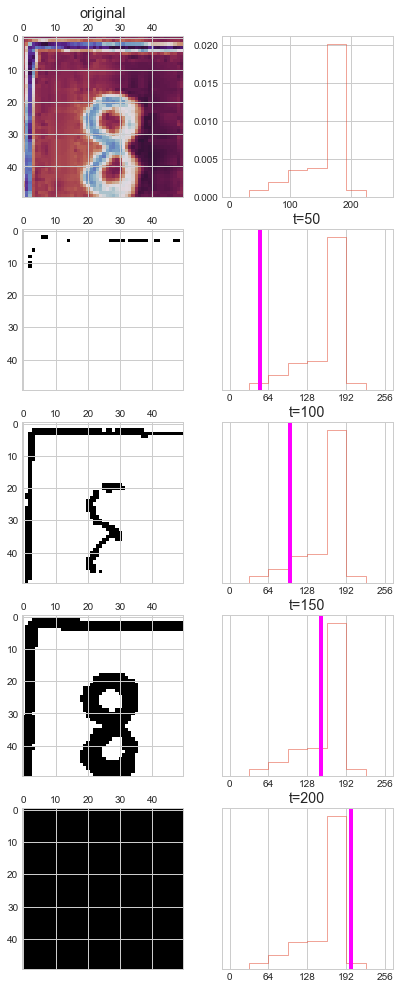

In [1415]:
a = cv.imread('sudoku9.jpg')[:50, :50]
a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(6, 16))
fig.clf()

ts = [50, 100, 150, 200]
gs = fig.add_gridspec(len(ts)+1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.matshow(a, cmap='twilight_shifted')
ax1.set_title("original")

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(a.ravel(), bins=[_*32 for _ in range(9)], histtype='step', density=True)

for i, t in enumerate(ts):    
    i = i + 1
    ax3 = fig.add_subplot(gs[i, 1])
    (T, b) = cv.threshold(a, t, 255, cv.THRESH_BINARY)
    bins = [_*32 for _ in range(9)]
#     ax3.hist(b.ravel(), bins=bins, color='green')
    ax3.hist(a.ravel(), bins=bins, histtype='step', density=True)

    ax3.set_title(f"t={t}")
    ax3.set_xticks(bins[::2])
    ax3.set_yticks([])
    ax3.axvline(t, color='magenta')
    ax4 = fig.add_subplot(gs[i, 0])
    ax4.matshow(b, cmap='gray')


## Sobel and Schaar

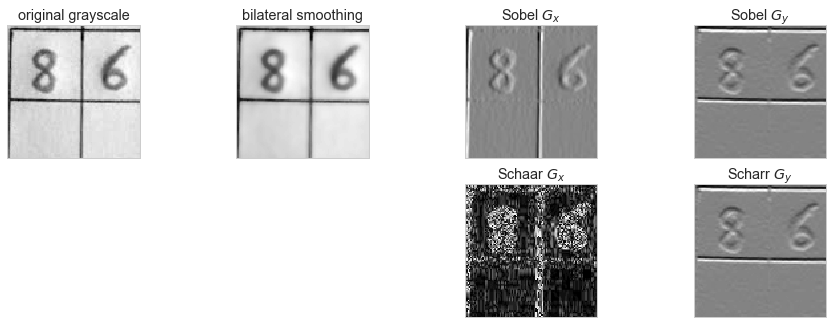

In [1418]:
s=100
a = cv.imread('sudoku9.jpg')
a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(14, 5))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])

ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[1, 3])


fig.set_size_inches((14, 5))
ax0.matshow(a[:s, :s], cmap='gray')
ax0.set_title('original grayscale')
b = cv.bilateralFilter(src=a, d=7, sigmaColor=50, sigmaSpace=50)
ax1.matshow(b[:s, :s], cmap='gray')
ax1.set_title('bilateral smoothing')
sX = cv.Sobel(a, cv.CV_64F, 1, 0, ksize=3)
sY = cv.Sobel(a, cv.CV_64F, 0, 1, ksize=3)

scX = cv.Sobel(a, cv.CV_64F, 1, 0, ksize=-1)
scY = cv.Sobel(a, cv.CV_64F, 0, 1, ksize=-1)

ax2.matshow(sX[:s, :s], cmap='gray')
ax2.set_title("Sobel $G_x$")
ax3.matshow(sY[:s, :s], cmap='gray')
ax3.set_title("Sobel $G_y$")

ax4.matshow(np.uint8(np.abs(scX[:s, :s])), cmap='gray')
ax4.set_title("Schaar $G_x$")
ax5.matshow(scY[:s, :s], cmap='gray')
ax5.set_title("Scharr $G_y$")

for _ in [ax0, ax1, ax2, ax3, ax4, ax5]: _.set_yticks([]);_.set_xticks([])

In [891]:
def formatter(x, pos):
    'The two args are the value and tick position'
    return '{:1.0f}K'.format(x*1e-3)

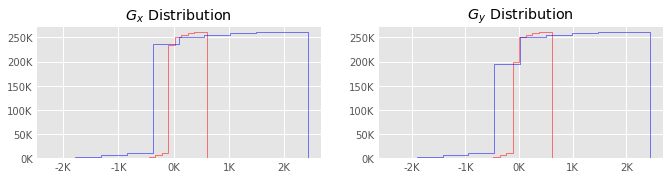

In [892]:
fig = plt.figure(figsize=(10, 5))
fig.clf()
fig
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
# ax1.hist(sX.ravel(), bins=10)
ax1.hist(sX.ravel(), bins=10, density=False, cumulative=True, label='CDF', histtype='step', color='red')
ax1.hist(scX.ravel(), bins=10, density=False, cumulative=True, label='CDF', histtype='step', color='blue')
ax1.set_title("$G_x$ Distribution")

ax2 = fig.add_subplot(gs[0, 1])
# ax2.hist(sY.ravel(), bins=10)
ax2.hist(sY.ravel(), bins=10, density=False, cumulative=True, label='CDF', histtype='step', color='red')
ax2.hist(scY.ravel(), bins=10, density=False, cumulative=True, label='CDF', histtype='step', color='blue')
ax2.set_title("$G_y$ Distribution")
ax2.yaxis.set_major_formatter(FuncFormatter(formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(formatter))
ax2.xaxis.set_major_formatter(FuncFormatter(formatter))
ax1.xaxis.set_major_formatter(FuncFormatter(formatter))

* schaar creates a larger magnitude difference

In [893]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.matshow(b), cmap='gray')

SyntaxError: invalid syntax (<ipython-input-893-4846a4708dd0>, line 3)

In [896]:
scXc = np.uint8(np.abs(scX))

In [897]:
_, scXC = cv.threshold(np.uint8(np.abs(scX)), 150, 255, cv.THRESH_BINARY)

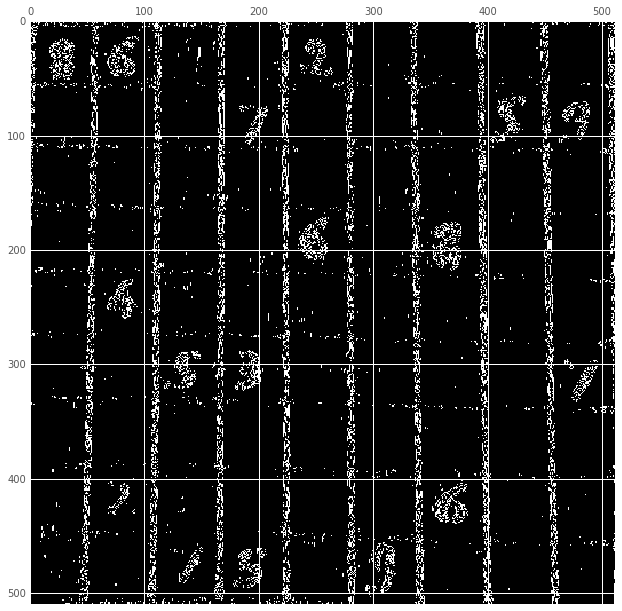

In [898]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.matshow(scXC, cmap='gray')

## Laplacian

In [899]:
a = cv.imread('sudoku9.jpg')
g = cv.cvtColor(a, cv.COLOR_BGR2GRAY) # gray
b = cv.bilateralFilter(a, 9, 50, 50)

In [900]:
g = cv.cvtColor(a, cv.COLOR_BGR2GRAY) 

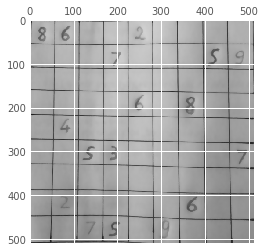

In [901]:
plt.matshow(b, cmap='gray')

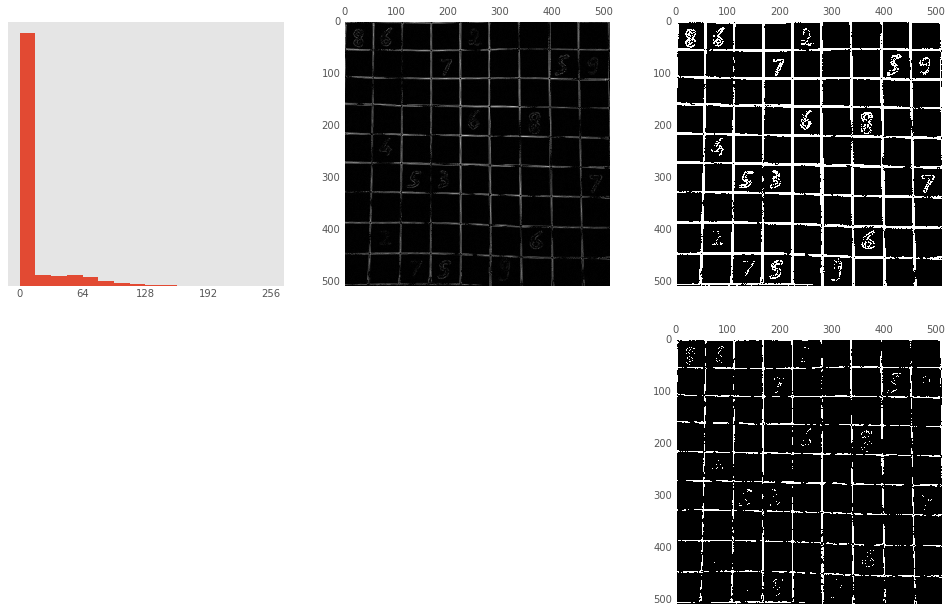

In [935]:
l = cv.Laplacian(b, cv.CV_64F)
l = np.uint8(np.abs(l))
fig.clf()
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2, 3)
ax  = fig.add_subplot(gs[0, 0])

bins = [_ * 16 for _ in range(17)]
ax.hist(l.ravel(), bins=bins)
ax.grid(b=None)
ax.set_yticks([])
ax.set_xticks(bins[::4])

ax = fig.add_subplot(gs[0, 1])
ax.matshow(l)
ax.grid(b=None)

_, t = cv.threshold(l, 10, 255, cv.THRESH_BINARY)
ax = fig.add_subplot(gs[0, 2])
ax.matshow(t)
ax.grid(b=None)

e = cv.erode(t, cv.getStructuringElement(cv.MORPH_ERODE, ksize=(3, 3)))
e = cv.erode(t, cv.getStructuringElement(cv.MORPH_DILATE, ksize=(3, 3)))
ax = fig.add_subplot(gs[1, 2])
ax.matshow(e)
ax.grid(b=None)

## Canny

In [1027]:
a = cv.imread('sudoku9.jpg')
g = cv.cvtColor(a, cv.COLOR_BGR2GRAY) # gray
c = cv.Canny(g, 20, 70)

<AxesSubplot:>

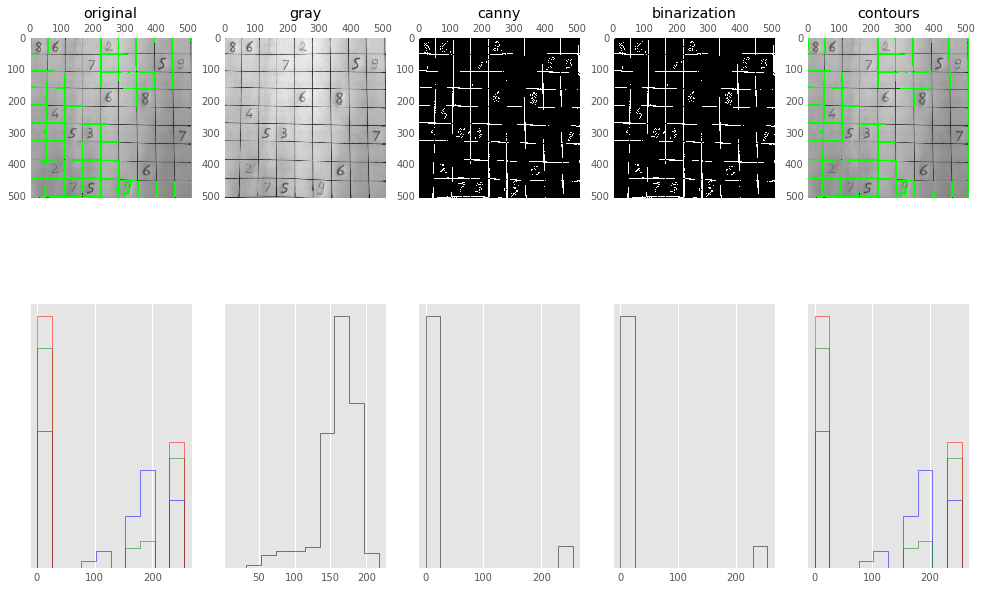

In [1046]:
fig.clf()
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2, 5)

ax  = fig.add_subplot(gs[0, 0])
image_plot(a, ax, "original")
ax  = fig.add_subplot(gs[1, 0])
hist_plot(a, ax)

ax  = fig.add_subplot(gs[0, 1])
image_plot(g, ax, "gray")
ax  = fig.add_subplot(gs[1, 1])
hist_plot(g, ax)

ax  = fig.add_subplot(gs[0, 2])
image_plot(c, ax, "canny")
ax  = fig.add_subplot(gs[1, 2])
hist_plot(c, ax)

_, t = cv.threshold(c, 150, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ax  = fig.add_subplot(gs[0, 3])
image_plot(t, ax, "binarization")
ax  = fig.add_subplot(gs[1, 3])
hist_plot(t, ax)

(contours, hierarchy) = cv.findContours(t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(a, contours, -1, (0, 255, 0), 2)
ax  = fig.add_subplot(gs[0, 4])
image_plot(a, ax, "contours")
ax  = fig.add_subplot(gs[1, 4])
hist_plot(a, ax)

## Corner Detection

In [1334]:
urls = Path("/Users/id/.fastai/data/kaggle-chess/test")
from fastai.vision.core import get_image_files

In [1335]:
ims = get_image_files(urls)

<AxesSubplot:>

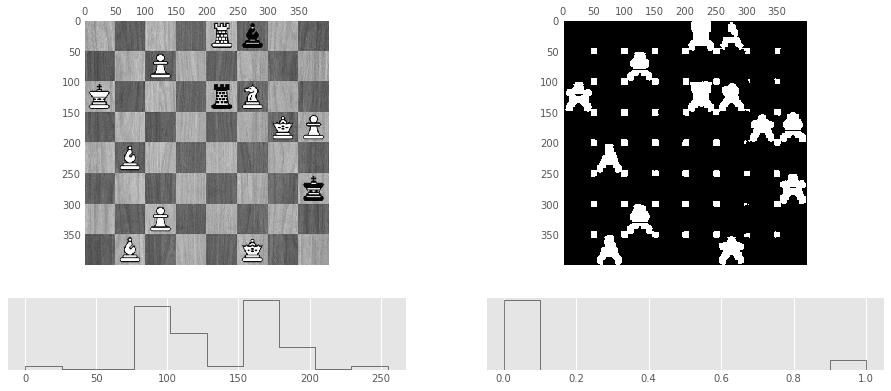

In [1404]:
idx = 7001
a = cv.imread(ims[idx].as_posix())
gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(14, 6))
fig.tight_layout()
hr = [1, 0.3]
gs = fig.add_gridspec(2, 2 ,height_ratios=hr)
ax = fig.add_subplot(gs[1, 0])
hist_plot(gray, ax)
ax = fig.add_subplot(gs[0, 0])
image_plot(gray, ax)

# ----
blockSize = 10
ksize = 3
c = cv.cornerHarris(src=gray, blockSize=blockSize, ksize=ksize, k=0.02)
(T, c) = cv.threshold(c, 0.0001, 1, cv.THRESH_BINARY)

ax = fig.add_subplot(gs[1, 1])
hist_plot(c, ax)
ax = fig.add_subplot(gs[0, 1])
image_plot(c, ax)

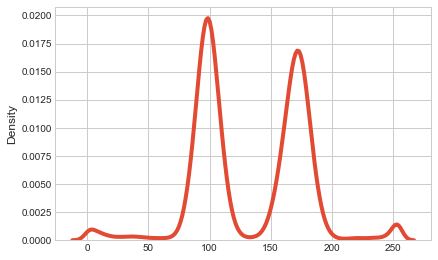

In [1412]:
sns.set_style('whitegrid')
ax = sns.kdeplot(gray.ravel())